## Deep Learning with ConvNets

In [9]:
import keras
print(keras.__version__)

# upgraded keras to 2.0.4
# pip install --upgrade keras

2.0.4


## LeNet Convolution Neural Network Code - MNIST Dataset

In [1]:
from keras import backend as k
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.convolutional import Convolution2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.datasets import mnist
from keras.optimizers import RMSprop, Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Flatten
%matplotlib inline

Using Theano backend.


In [2]:
# define the LeNet convnet model first as per the layer
class LeNet:
    def build(input_shape, classes):
        model = Sequential()
        #1st layer conv -> relu -> pooling
        model.add(Convolution2D(20, kernel_size=5, padding='same', input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(strides=(2,2), pool_size=(2,2)))
        #2nd layer conv -> relu -> pooling
        model.add(Conv2D(50, kernel_size=5, border_mode='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(strides=(2,2), pool_size=(2,2)))        
        # 3rd layer - for flattening the output and pass through the softmax
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

In [6]:
# Repititive steps as last time for training the model

OPTIMIZER = Adam()
NB_EPOCHS = 20   # decreasing the number of epochs to reduce the time for MLP, also for the RMSPROP and ADAM optimizers
SPLIT_PARAM = 0.2
# RESHAPED = 784
# NB_HIDDEN_NEURONS = 128
NB_CLASSES = 10
VERBOSE =1
BATCH_SIZE = 128
DROPOUT_RATE = 0.3
NB_ROW, NB_COLS = 28, 28
INPUT_SHAPE = (1,NB_ROW,NB_COLS)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
k.set_image_dim_ordering("th")

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize the data
X_train /= 255
X_test /= 255

#convert labels to a one hot encoding vector
train_labels = np_utils.to_categorical(Y_train, NB_CLASSES)
test_labels = np_utils.to_categorical(Y_test, NB_CLASSES)

print(X_train.shape)
print(X_test.shape)

X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 1, 28, 28)
(10000, 1, 28, 28)
(60000,)
(10000,)


In [4]:
#Initialize the Optimizer and train and test the model, and print the accuracy and other metrics along with 
# the graphs
model = LeNet.build(input_shape=INPUT_SHAPE,classes=NB_CLASSES)
model.summary()

/Users/tkmacl9/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 20, 28, 28)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 14, 14)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 50, 14, 14)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 7, 7)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [7]:
# Compile the Model , and train and test
# There was a dimension mismatch error which was resolved using the sparse loss function
model.compile(optimizer=OPTIMIZER, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=VERBOSE, validation_split=SPLIT_PARAM)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 101s - loss: 0.1773 - acc: 0.9464 - val_loss: 0.0631 - val_acc: 0.9803
Epoch 2/20
48000/48000 [==============================] - 102s - loss: 0.0521 - acc: 0.9839 - val_loss: 0.0450 - val_acc: 0.9872
Epoch 3/20
48000/48000 [==============================] - 108s - loss: 0.0331 - acc: 0.9898 - val_loss: 0.0416 - val_acc: 0.9879
Epoch 4/20
48000/48000 [==============================] - 108s - loss: 0.0246 - acc: 0.9924 - val_loss: 0.0361 - val_acc: 0.9891
Epoch 5/20
48000/48000 [==============================] - 108s - loss: 0.0185 - acc: 0.9936 - val_loss: 0.0372 - val_acc: 0.9893
Epoch 6/20
48000/48000 [==============================] - 108s - loss: 0.0145 - acc: 0.9952 - val_loss: 0.0359 - val_acc: 0.9901
Epoch 7/20
48000/48000 [==============================] - 107s - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0376 - val_acc: 0.9894
Epoch 8/20
48000/48000 [=======================

10000/10000 [==============================] - 7s     
Test Score:  0.032260034822
Test Accuracy:  0.9937
dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])


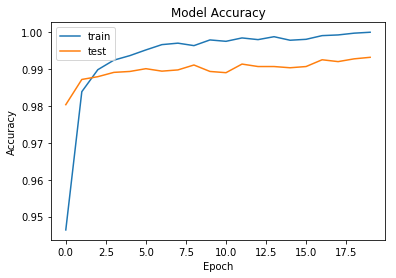

In [8]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

#list all data in history
print(history.history.keys())

#Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

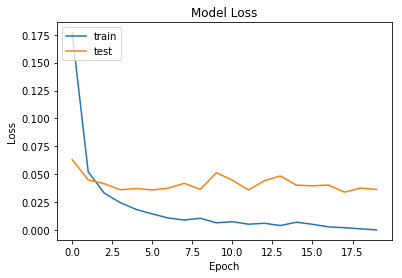

In [9]:
#Summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()